# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model? **No, because you do not have another model to compare it against to determine if it's better or worse.**

**Task2**:

Describe overfitting, in the context of this course. **Overfitting is when the model applies to the data set given, but not another similar data set.**

**Task3**:

How do we mitigate overfitting? **Using weak priors, or the priors Bambi selects.**

**Task4**:

How do we mitigate underfitting? **Using a more complicated model.**

**Task5**:

Why would we want more than one predictor in a model? **Real world scenarios are usually affected by more than one thing, so it will create a more accurate model.**

**Task6**:

Can we have too many predictors? How would we know? **Yes, and we would know because the model could be overfit and hard to interpret. Variables with a higher eldp_loo will be more impactful as predictors.**

**Task7**:

What is variable selection, and how does it work? **Variable selection is the process of picking the predictors for a model. You do this by creating a casual diagram to determine the order of predictors, and then checking that with eldp_loo to see which variables are most significant.**

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

**All of the regressions are linear and allow for inference. With the first model, the slopes are the same and do not differ by group. With the second, each group creates a different relationship. With the third, each group is affected by the predictor differently.**

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once? **We can visualize the model with mulitple lines that distinguish groups. It essentially projects the model into 2D format. We can't visualize the entire model all at once, because humans cannot visualize more than 3 dimensions.**

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [9]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import graphviz as gv
import matplotlib.pyplot as plt
import seaborn as sns
!pip install bambi
import bambi as bmb


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 3.9 MB/s eta 0:00:00


In [3]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv'
    ).dropna()

In [4]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

In [ ]:
#define the model
model_basketball = bmb.Model("`FGp` ~ `FTp` + Pos", data=bb)
#fit the model
idata_basketball = model_basketball.fit(idata_kwargs={'log_likelihood': True})

(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

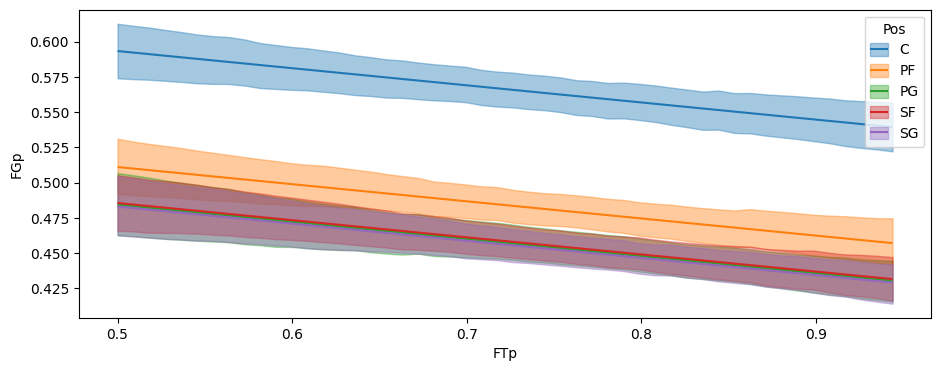

In [15]:
bmb.interpret.plot_predictions(model_basketball,
                               idata_basketball,
                                ["FTp",  "Pos"], fig_kwargs={"figsize":(11, 4)})

In [ ]:
#define the model, but as a hierarchy
model_basketball_h = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb)
#create the model
idata_basketball_h = model_basketball_h.fit(idata_kwargs={'log_likelihood': True})

(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

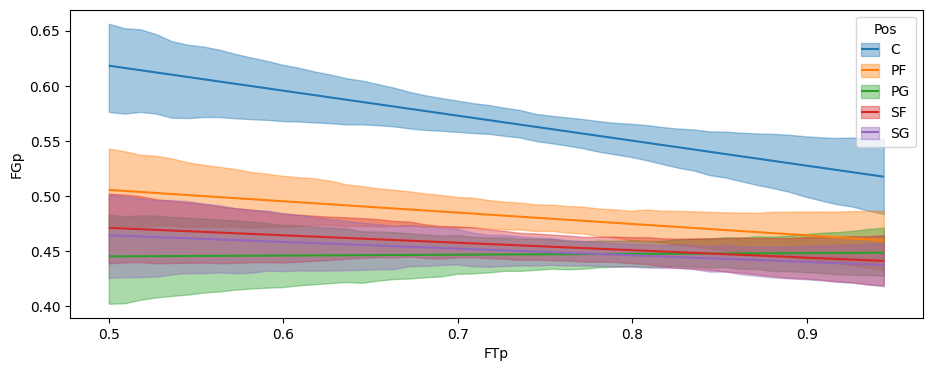

In [17]:
bmb.interpret.plot_predictions(model_basketball_h,
                               idata_basketball_h,
                               ["FTp","Pos"],
                               fig_kwargs={"figsize":(11, 4)})

In [ ]:
#define the model; bb_inter stands for baskeball interaction
model_bb_inter = bmb.Model("`FGp` ~ `FTp` + Pos + `FTp`:Pos", data=bb)
#create the model
idata_bb_inter = model_bb_inter.fit(idata_kwargs={'log_likelihood': True})

(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

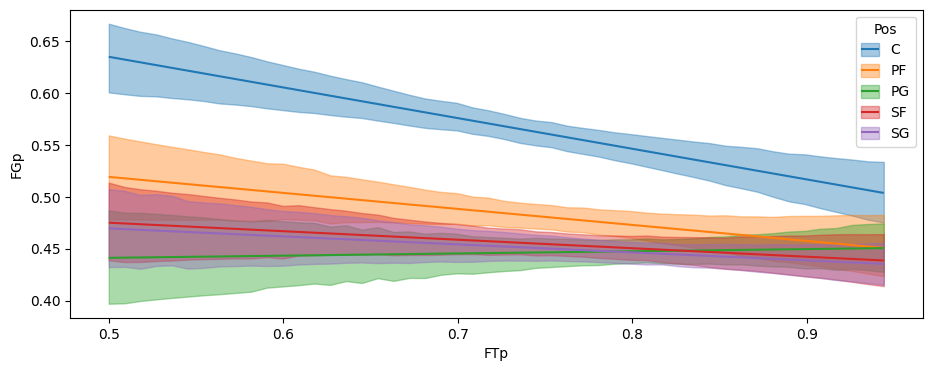

In [19]:
bmb.interpret.plot_predictions(model_bb_inter,
                               idata_bb_inter,
                               ["FTp","Pos"],
                               fig_kwargs={"figsize":(11, 4)})

In [ ]:
#define the model
model_bb_inter4 = bmb.Model("`FGp` ~ `FTp` + `3PA` + Pos + `FTp`:`3PA` + `FTp`:Pos + `3PA`:Pos + `3PA`:`FTp`:`Pos`", data=bb)
#create the model
idata_bb_inter4 = model_bb_inter4.fit(idata_kwargs={'log_likelihood': True})

(<Figure size 1100x1300 with 6 Axes>,
 array([[<Axes: title={'center': 'Pos = C'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PG'}, xlabel='FTp', ylabel='FGp'>],
        [<Axes: title={'center': 'Pos = SF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = SG'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: xlabel='FTp', ylabel='FGp'>]], dtype=object))

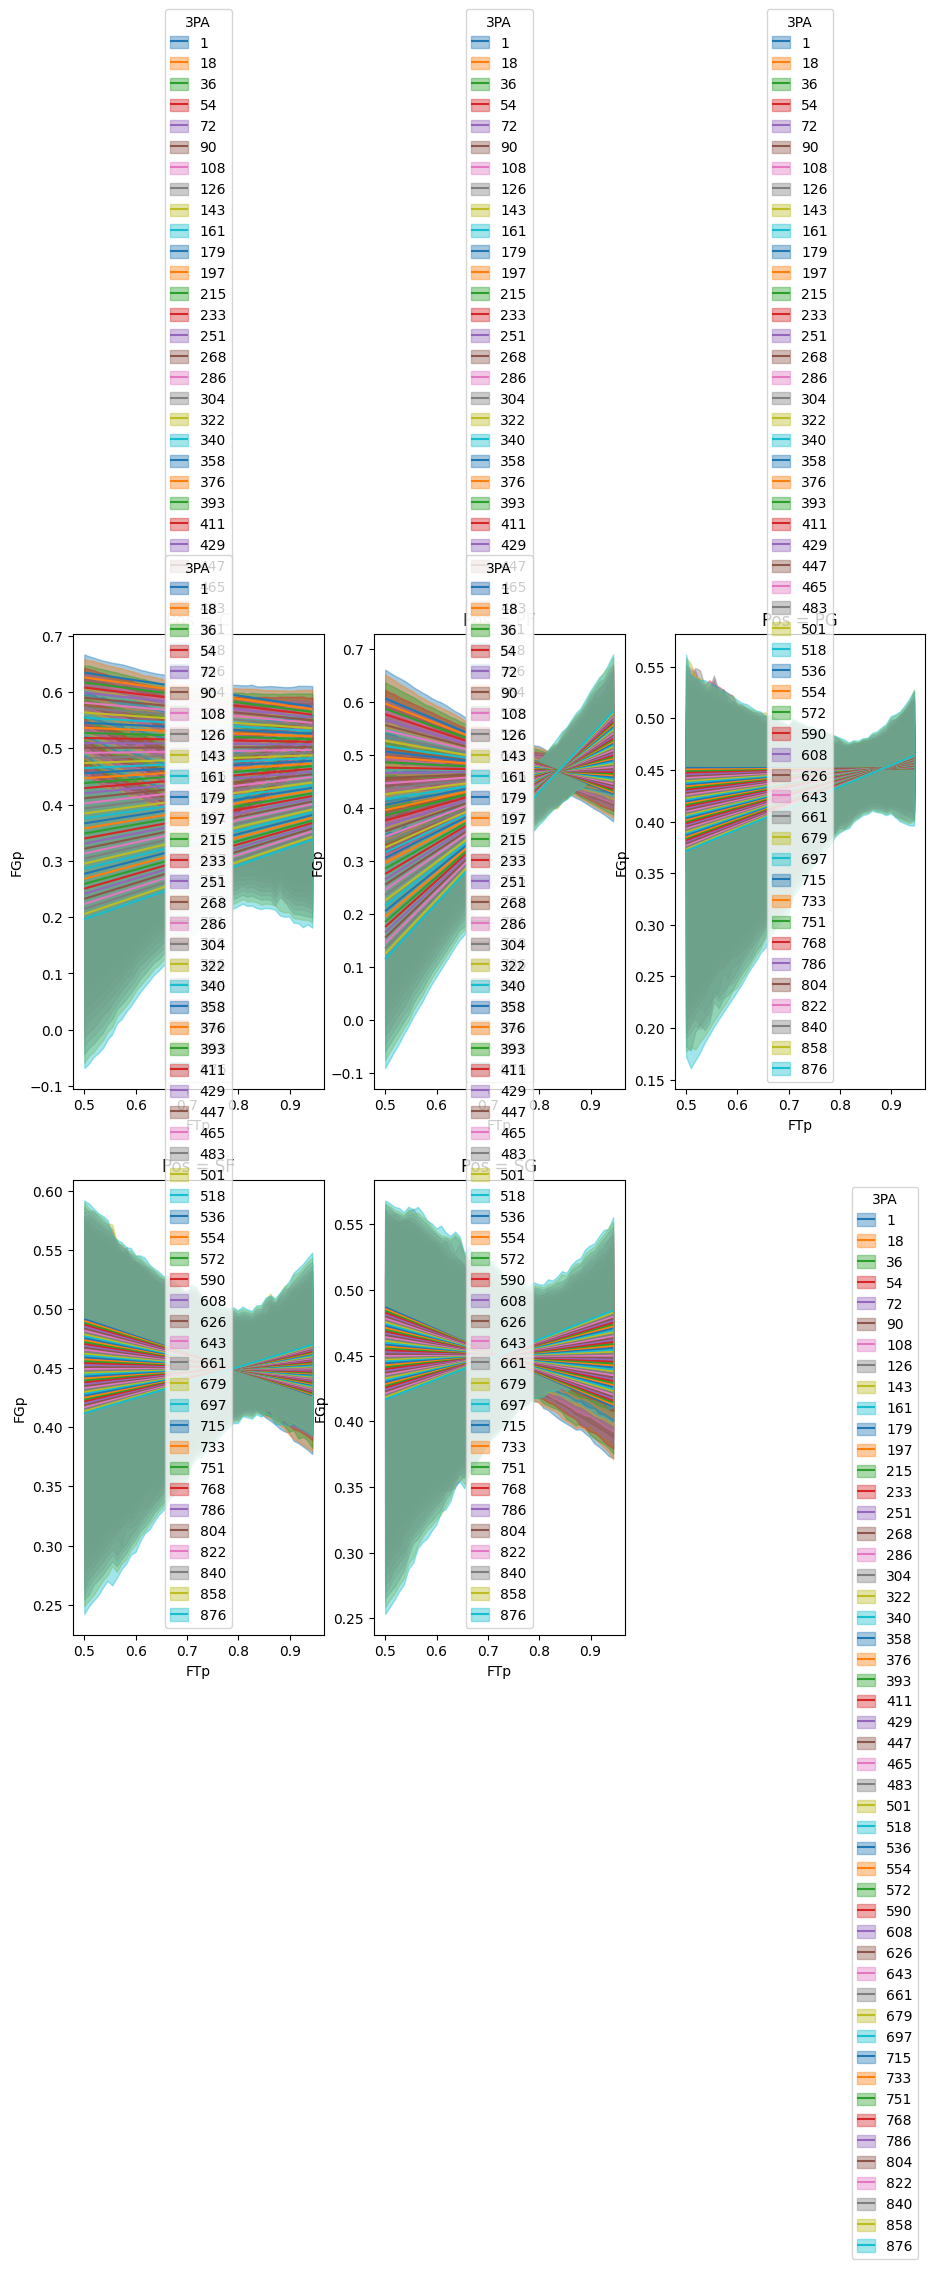

In [22]:
bmb.interpret.plot_predictions(model_bb_inter4,
                               idata_bb_inter4,
                               ["FTp","3PA", "Pos"],
                               fig_kwargs={"figsize":(11, 13)})#,
                               #legend=False)

In [ ]:
#define the model
model_bb_inter5 = bmb.Model("`FGp` ~ `FTp` + `3PA` + Pos + Pos:`3PA`", data=bb)
#create the model
idata_bb_inter5 = model_bb_inter5.fit(idata_kwargs={'log_likelihood': True})

(<Figure size 1100x1300 with 6 Axes>,
 array([[<Axes: title={'center': 'Pos = C'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PG'}, xlabel='FTp', ylabel='FGp'>],
        [<Axes: title={'center': 'Pos = SF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = SG'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: xlabel='FTp', ylabel='FGp'>]], dtype=object))

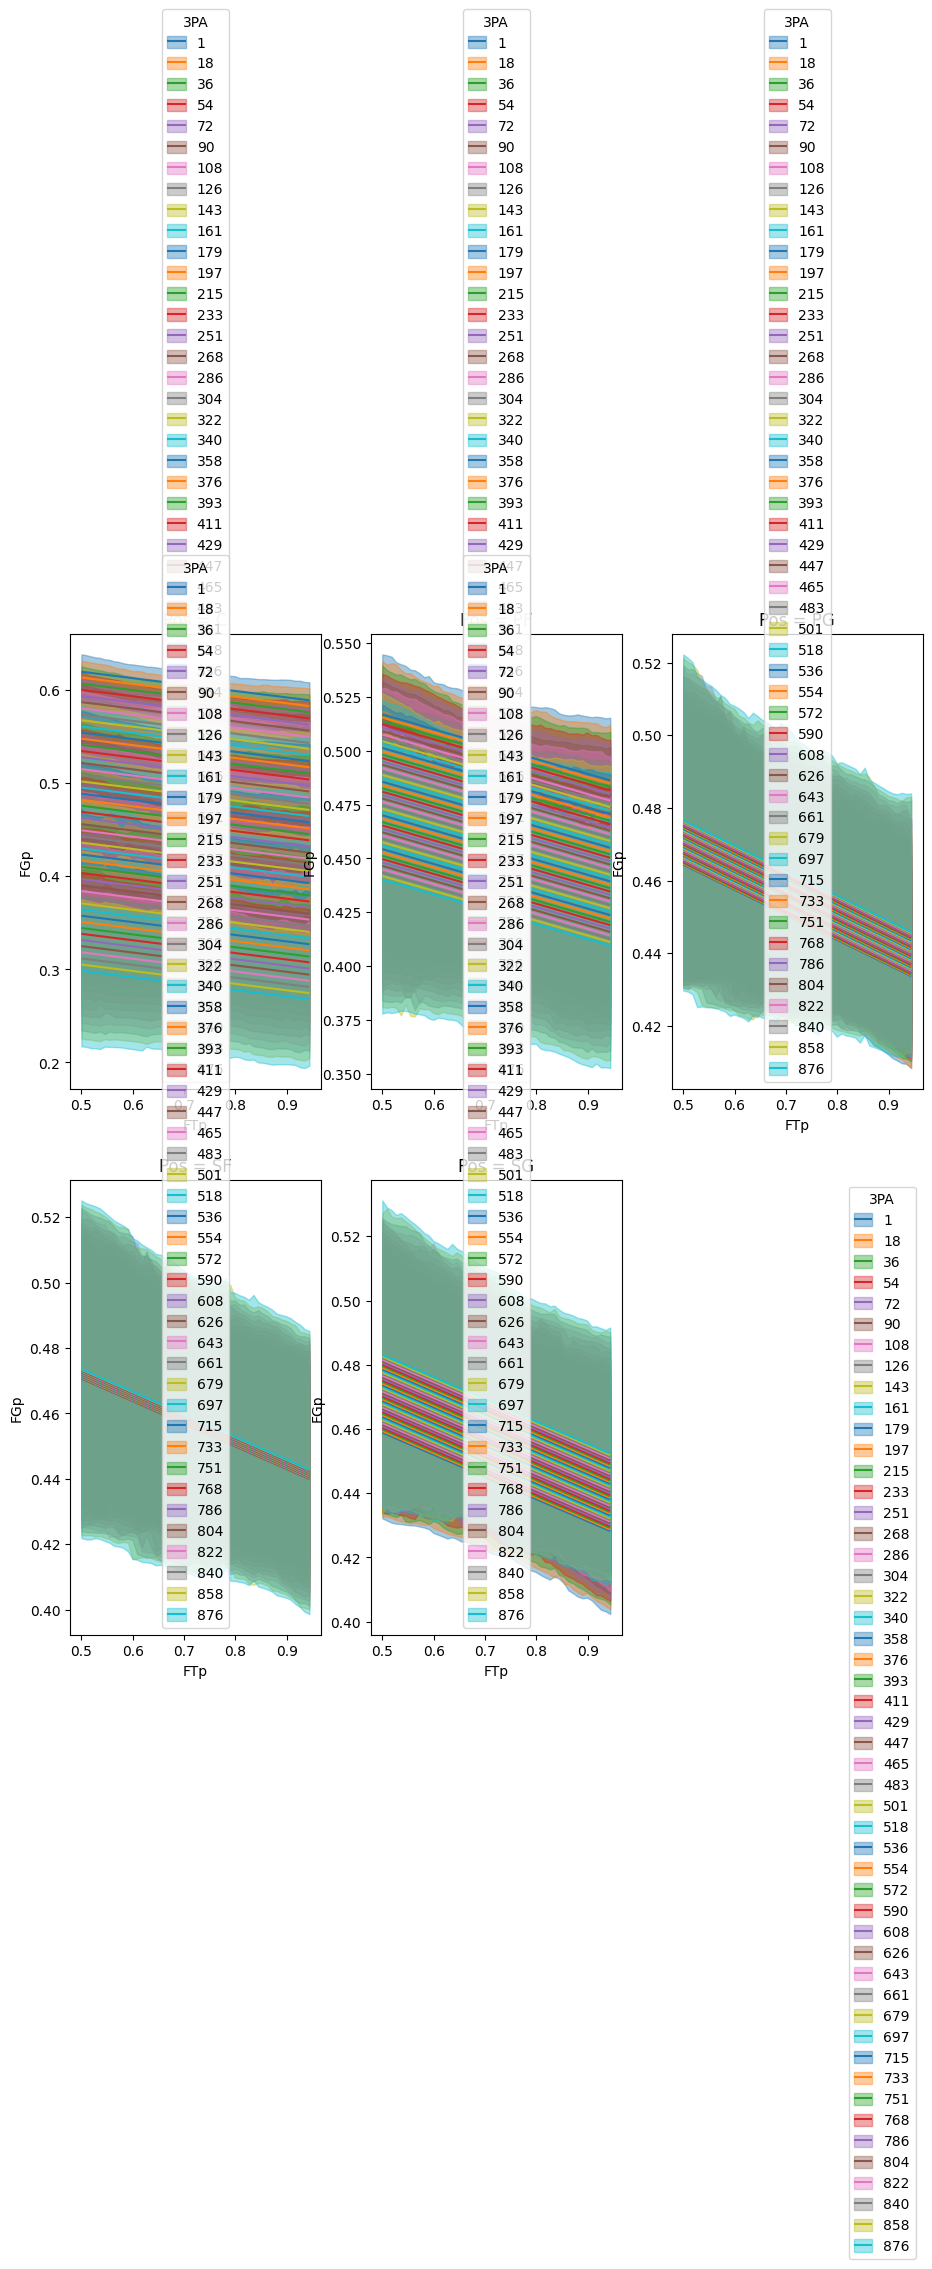

In [24]:
bmb.interpret.plot_predictions(model_bb_inter5,
                               idata_bb_inter5,
                               ["FTp","3PA", "Pos"],
                               fig_kwargs={"figsize":(11, 13)})#,
                               #legend=False)

In [25]:
cmp_df = az.compare(
    {"1":idata_basketball,"2":idata_basketball_h,"3":idata_bb_inter,"4":idata_bb_inter4, "5":idata_bb_inter5} )
cmp_df

/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
4,0,530.132350,21.791900,0.000000,4.254170e-01,14.435866,0.000000,True,log
5,1,529.998375,12.537794,0.133975,5.745830e-01,15.838378,5.878564,False,log
3,2,509.198363,14.046093,20.933986,0.000000e+00,16.805399,8.435824,False,log
2,3,508.258244,13.776184,21.874106,0.000000e+00,17.013511,8.656750,True,log
1,4,507.499914,8.107627,22.632435,7.327472e-15,16.057104,8.296938,False,log


**Task11**:

Which model is "better" according to this metric?

Why do you think that is?


**The fourth model is the best, and I think that is because it accounts for all predictors and combinations of predictors.**

**Task12:**

The body data set has a measure of body fat percentage (siri), as well as several other measurments of other parts of a person's body, plus their age.

Create a sensible causal diagram for this set of variables.

Based on your causal diagram, which variable should you try to predict? Why?

In [5]:
body = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/body_fat.csv')

In [6]:
body.head()

,siri,age,weight,height,abdomen,thigh,wrist
0,12.3,23,70.1,172,85.2,59.0,17.1
1,6.1,22,78.8,184,83.0,58.7,18.2
2,25.3,22,70.0,168,87.9,59.6,16.6
3,10.4,26,84.0,184,86.4,60.1,18.2
4,28.7,24,83.8,181,100.0,63.2,17.7


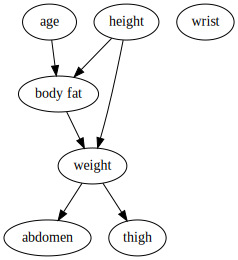

In [7]:
b_dag = gv.Digraph(name="Body DAG")

b_dag.node('F','body fat')
b_dag.node('A','age')
b_dag.node('H','height')
b_dag.node('L','weight')
b_dag.node('S','abdomen')
b_dag.node('T','thigh')
b_dag.node('W','wrist')

b_dag.edges(['AF','FL','LS','LT','HL','HF'])

b_dag

I think you should try to predict weight.